In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [2]:
data = load_diabetes()

In [3]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target

In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
from sklearn.model_selection import train_test_split
x = df.drop(['target'],axis=1)
y = df[['target']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

### How are coefs effected?

In [6]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
coefs = []
r2_scores = []
alphas = [0,0.1,1,10]
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train,y_train)
    y_pred = lasso.predict(x_test)
    r2_scores.append(r2_score(y_test,y_pred))
    coefs.append(np.concatenate([[alpha],lasso.coef_]))
coefs = pd.DataFrame(coefs,columns=np.concatenate([['alpha'],data.feature_names]))
coefs
    

/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV inste

,alpha,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.0,-9.158653,-205.454322,516.693745,340.619999,-895.551989,561.220669,153.893104,126.731395,861.126997,52.421122
1,0.1,0.000000,-113.969928,526.744396,292.628472,-82.693681,-0.000000,-152.685338,0.000000,551.080291,7.170992
2,1.0,0.000000,0.000000,363.885742,27.273163,0.000000,0.000000,-0.000000,0.000000,336.137262,0.000000
3,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


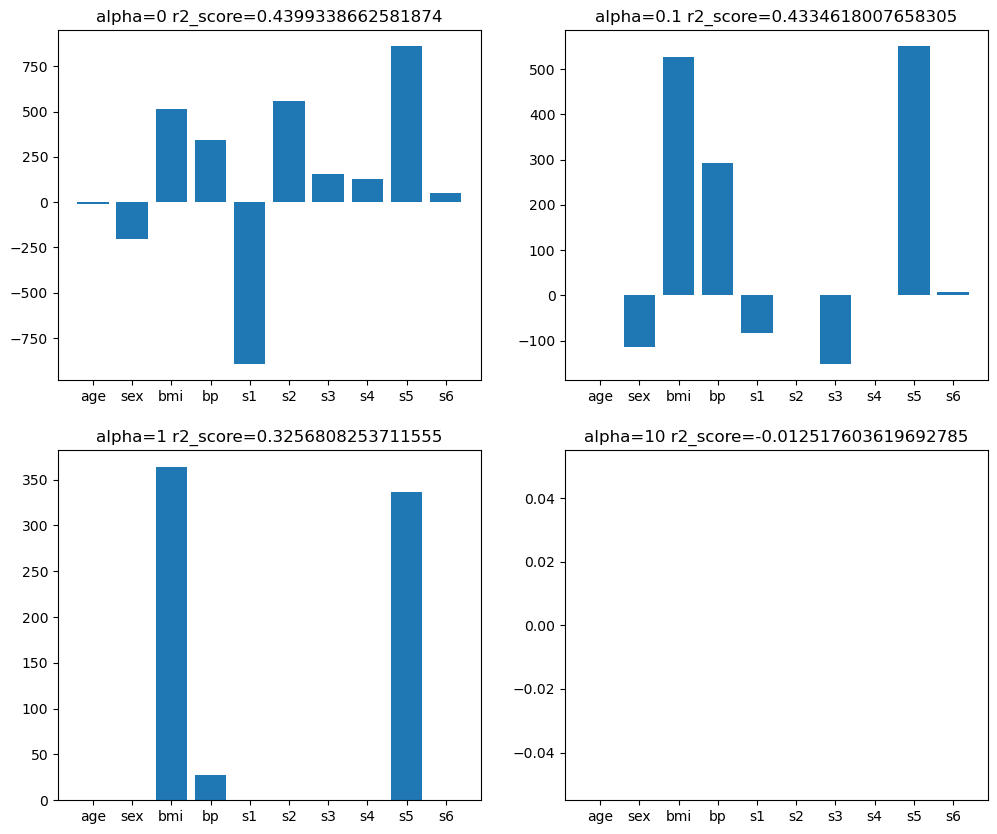

In [7]:
plt.figure(figsize=(12,10))
for i in range(len(alphas)):
    plt.subplot(2,2,i+1)
    plt.bar(data.feature_names,coefs.iloc[i,1:])
    plt.title("alpha={} r2_score={}".format(alphas[i],r2_scores[i]))

### Impact on higher coefs

In [8]:

alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
coefs = []
for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(x_train,y_train)
    coefs.append(reg.coef_.tolist())
coefs = pd.DataFrame(coefs,columns=data.feature_names)
coefs

/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV inste

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,-9.158653,-205.454322,516.693745,340.619999,-895.551989,561.220669,153.893104,126.731395,861.126997,52.421122
1,-9.069064,-205.329406,516.789418,340.532379,-888.660904,555.958584,150.593655,125.450143,858.645541,52.380294
2,-8.262770,-204.205364,517.650073,339.743901,-826.663603,508.617395,120.908607,113.921773,836.320753,52.012849
3,-1.359721,-192.937180,526.356514,332.641101,-430.226975,191.295480,-44.034913,68.988987,688.396028,47.940616
4,0.000000,-113.969928,526.744396,292.628472,-82.693681,-0.000000,-152.685338,0.000000,551.080291,7.170992
5,0.000000,0.000000,363.885742,27.273163,0.000000,0.000000,-0.000000,0.000000,336.137262,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [9]:
coefs = []
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train,y_train)
    coefs.append(np.concatenate([[alpha],lasso.coef_]))
coefs = pd.DataFrame(coefs,columns=np.concatenate([['alpha'],data.feature_names]))
coefs

/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV inste

,alpha,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.551989,561.220669,153.893104,126.731395,861.126997,52.421122
1,0.0001,-9.069064,-205.329406,516.789418,340.532379,-888.660904,555.958584,150.593655,125.450143,858.645541,52.380294
2,0.0005,-8.710710,-204.829785,517.172032,340.181919,-861.101044,534.913748,137.397854,120.325713,848.721375,52.216981
3,0.0010,-8.262770,-204.205364,517.650073,339.743901,-826.663603,508.617395,120.908607,113.921773,836.320753,52.012849
4,0.0050,-4.776003,-199.206818,521.494150,336.305971,-569.689701,311.115655,0.000000,68.634844,743.335081,50.346040
5,0.1000,0.000000,-113.969928,526.744396,292.628472,-82.693681,-0.000000,-152.685338,0.000000,551.080291,7.170992
6,0.5000,0.000000,-0.000000,473.196941,155.449933,-0.000000,-0.000000,-22.243650,0.000000,448.941075,0.000000
7,1.0000,0.000000,0.000000,363.885742,27.273163,0.000000,0.000000,-0.000000,0.000000,336.137262,0.000000
8,5.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
9,10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


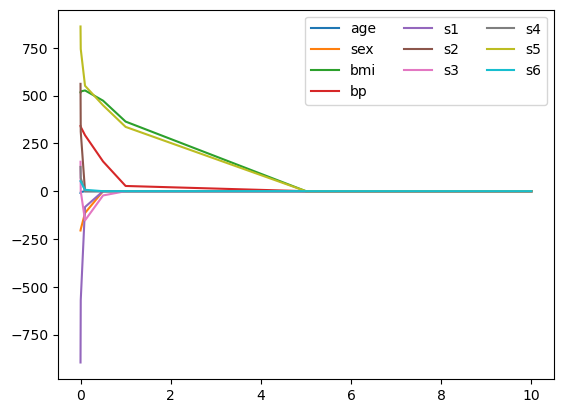

In [10]:
plt.plot(coefs['alpha'],coefs['age'],label='age')
plt.plot(coefs['alpha'],coefs['sex'],label='sex')
plt.plot(coefs['alpha'],coefs['bmi'],label='bmi')
plt.plot(coefs['alpha'],coefs['bp'],label='bp')
plt.plot(coefs['alpha'],coefs['s1'],label='s1')
plt.plot(coefs['alpha'],coefs['s2'],label='s2')
plt.plot(coefs['alpha'],coefs['s3'],label='s3')
plt.plot(coefs['alpha'],coefs['s4'],label='s4')
plt.plot(coefs['alpha'],coefs['s5'],label='s5')
plt.plot(coefs['alpha'],coefs['s6'],label='s6')
plt.legend(ncols=3)

### impact on variance and bias

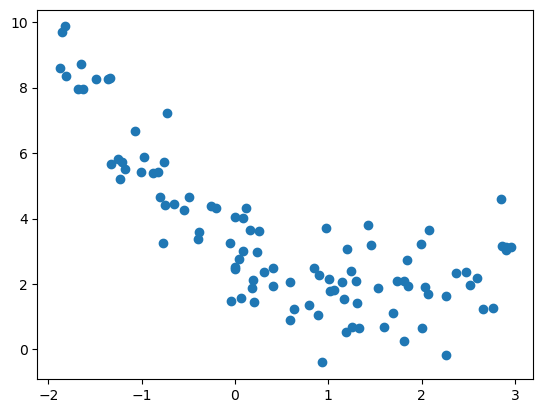

In [13]:
m = 100
x = 5 * np.random.rand(m, 1) - 2
y = 0.7 * x ** 2 - 2 * x + 3 + np.random.randn(m, 1)

plt.scatter(x, y)
plt.show()

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x.reshape(100,1)
                                                 ,y.reshape(100)
                                                 ,test_size=0.2,random_state=2)

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)

x_train = poly.fit_transform(x_train)
x_test = poly.transform(x_test)

In [18]:
from mlxtend.evaluate import bias_variance_decomp
import warnings
warnings.filterwarnings('ignore')
alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Lasso(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, x_train, y_train, x_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

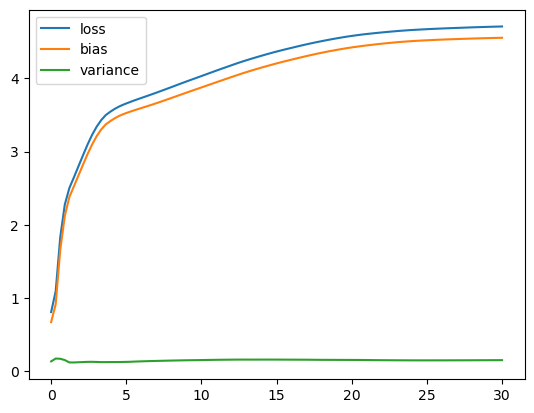

In [17]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='bias')
plt.plot(alphas,variance,label='variance')
plt.legend()

### effect of loss function


In [22]:
from sklearn.datasets import make_regression
x,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)
reg.intercept_,reg.coef_

(-2.29474455867698, array([27.82809103]))

In [28]:
def calc_loss(m,alpha):
    return np.sum((y-m*x.ravel()+2.29)**2) * alpha*abs(m)

In [29]:
def predict(m):
    return m*x-2.29

Text(0, 0.5, 'loss')

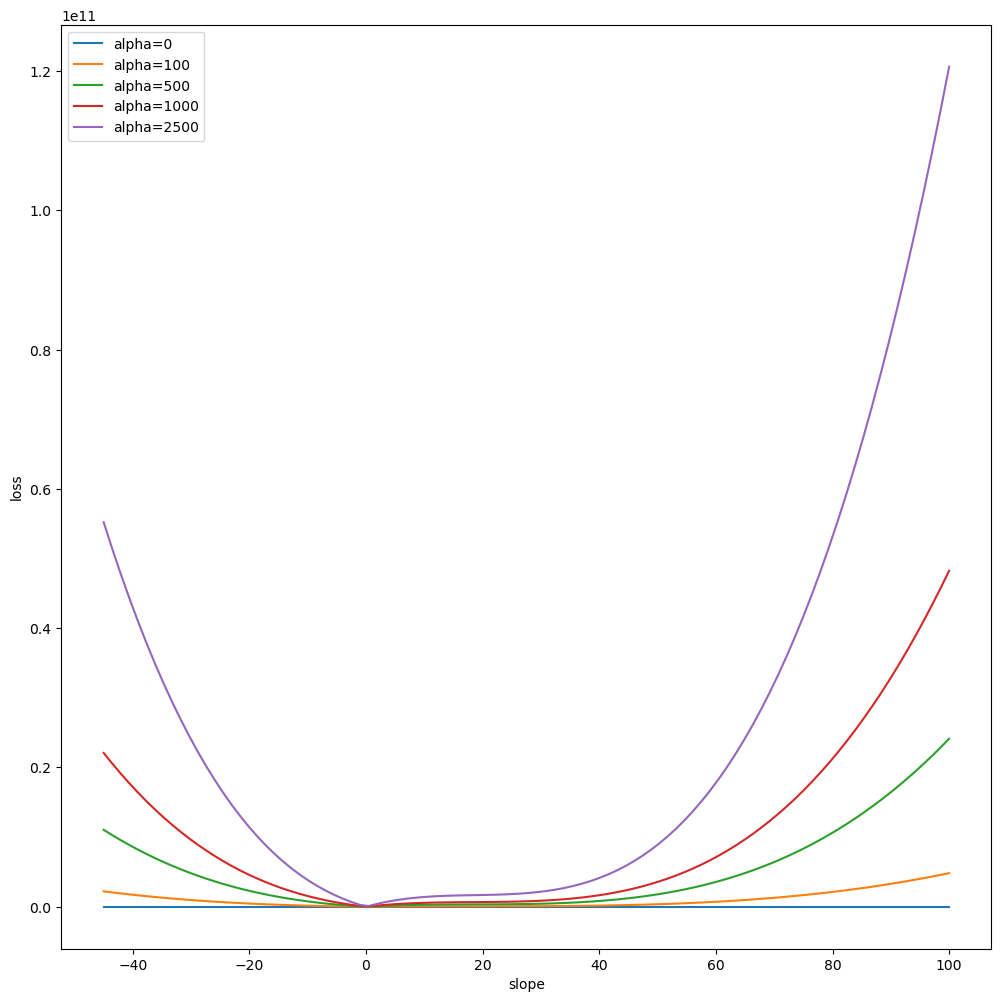

In [30]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(12,12))
for j in [0,100,500,1000,2500]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = calc_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha={}'.format(j))
plt.legend()
plt.xlabel('slope')
plt.ylabel('loss')
